#### Anomaly detction using python 
Cyclone_Inlet_Gas_Temp: The Inlet temperature of the gas 
Cyclone_Material_Temp:  The temperature of the material during operation   
Cyclone_Outlet_Gas_draft: The difference between atmospheric pressure and the pressure existing in the cone   
Cyclone_cone_draft .:  The pressure condition inside the cone       
 Cyclone_Gas_Outlet_Temp: The outlet temperature of the gas 
 Cyclone_Inlet_Draft: The difference between atmospheric pressure and the pressure existing in the cone
 

Target feature could be : cone draft 


In [1]:
# importing the nessecary librraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('C:/Users/DELL/Downloads/data.xlsx - internship-data-1.csv')

In [3]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [4]:
df.shape

(377719, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   time                      377719 non-null  object
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object
 2   Cyclone_Material_Temp     377719 non-null  object
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object
 4   Cyclone_cone_draft        377719 non-null  object
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object
 6   Cyclone_Inlet_Draft       377719 non-null  object
dtypes: object(7)
memory usage: 20.2+ MB


In [29]:
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
std,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [6]:
# to change the data type 
sr = pd.Series(df['time'])
  
# convert the series to datetime
sr = pd.to_datetime(sr)
  
# create a pandas dataframe with a
# column having timestamps
df['time'] = sr
    
# view the created dataframe


In [7]:
df = df.set_index('time')


In [8]:
df['Cyclone_Inlet_Gas_Temp'] = pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'],errors='coerce')
df['Cyclone_Material_Temp'] = pd.to_numeric(df['Cyclone_Material_Temp'],errors='coerce')
df['Cyclone_Outlet_Gas_draft'] = pd.to_numeric(df['Cyclone_Outlet_Gas_draft'],errors='coerce')
df['Cyclone_cone_draft'] = pd.to_numeric(df['Cyclone_cone_draft'],errors='coerce')
df['Cyclone_Gas_Outlet_Temp'] = pd.to_numeric(df['Cyclone_Gas_Outlet_Temp'],errors='coerce')
df['Cyclone_Inlet_Draft'] = pd.to_numeric(df['Cyclone_Inlet_Draft'],errors='coerce')


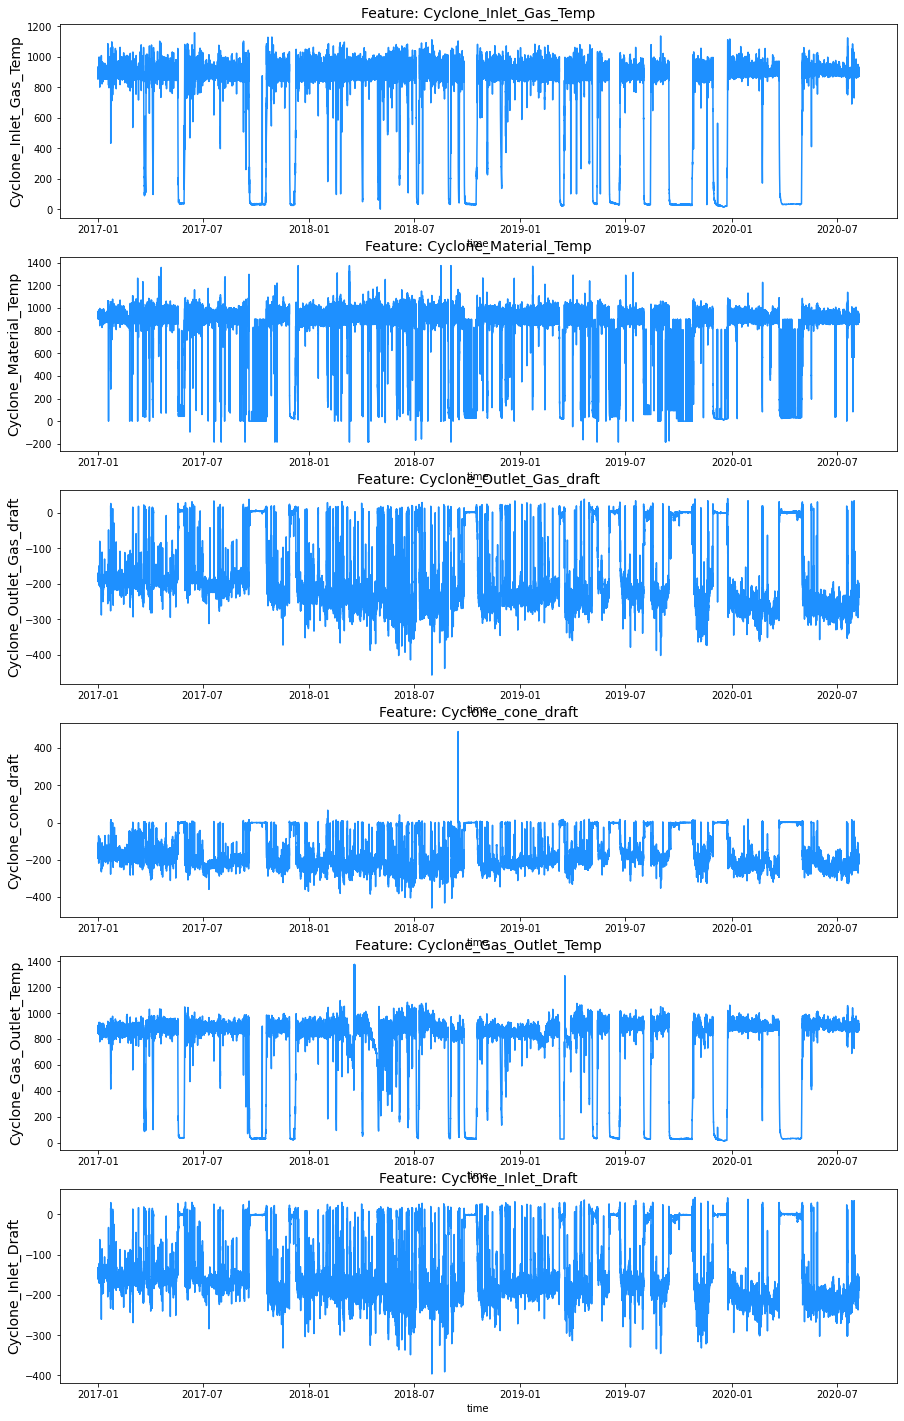

In [9]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
   # ax[i].set_xlim([date(2017, 1, 1), date(2021, 6, 30)])                

2.1 Handle Missings

As we can see, the dataset has some null values.



In [10]:

df.isna().sum()

Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

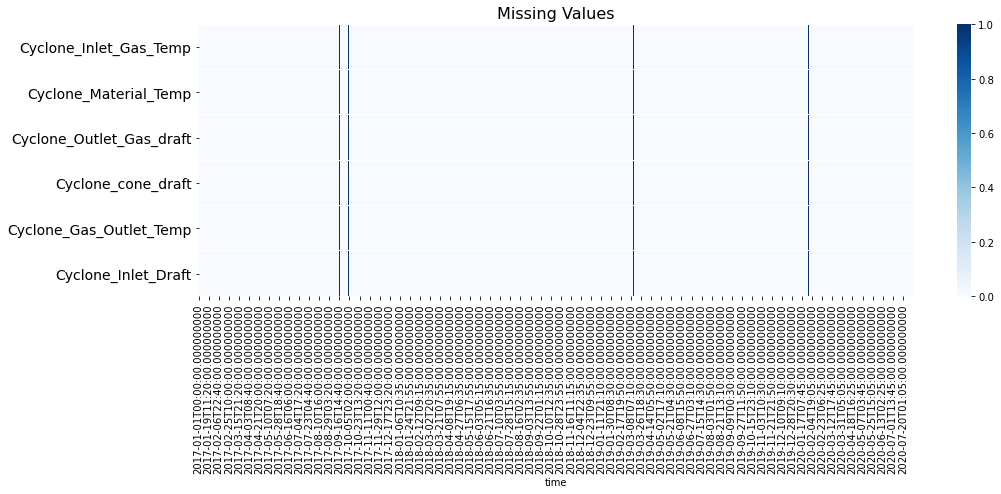

In [11]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

<AxesSubplot:>

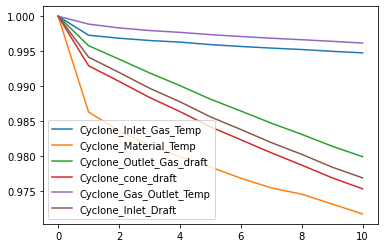

In [12]:
#To fill in missing values, first check for linearity in each column using autocorelation plots
def get_acf(data,lags): 
    frame = []
    for i in range(lags+1):
        frame.append(data.apply(lambda col: col.autocorr(i), axis=0))
    return pd.DataFrame(frame).plot.line()
get_acf(df,10)

Seems like acfs start dropping after 10 lags for majority of signals. So lets do linear interpolation but with a limit of 10

Missing Values, how to handle
Option 1: Fill NaN with Outlier or Zero
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

Option 2: Fill NaN with Mean Value
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

Option 3: Fill NaN with Last Value with .ffill()
Filling NaNs with the last value could be bit better.

Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()
Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

WE Will use option 2 as it seems most viable solution to our problem

In [13]:
droping_list_all=[]
for j in range(0,6):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5]

In [14]:
for j in range(0,):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

Resampling can provide additional information on the data. There are two types of resampling:

Upsampling is when the frequency of samples is increased (e.g. days to hours)
Downsampling is when the frequency of samples is decreased (e.g. days to weeks)
In this example, we will do some upsampleling with the .resample() function (similar to groupby and aggregate as mean).

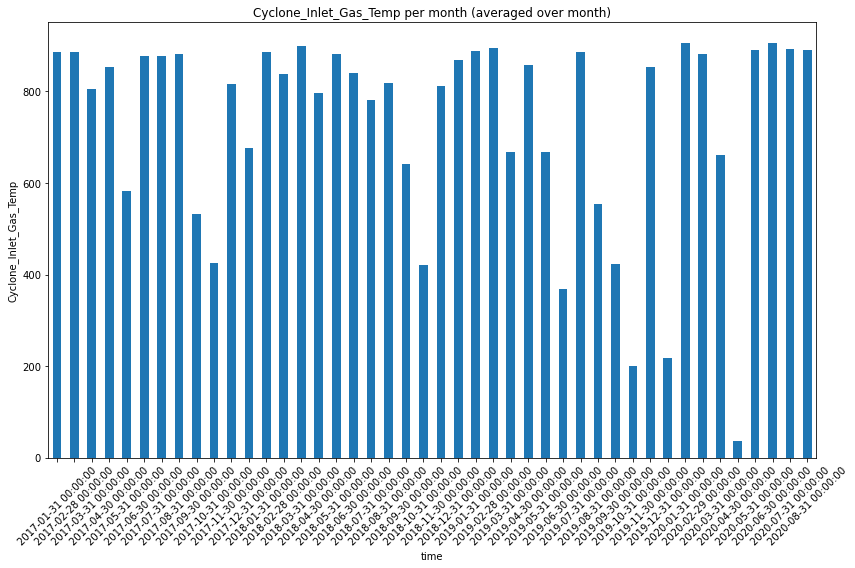

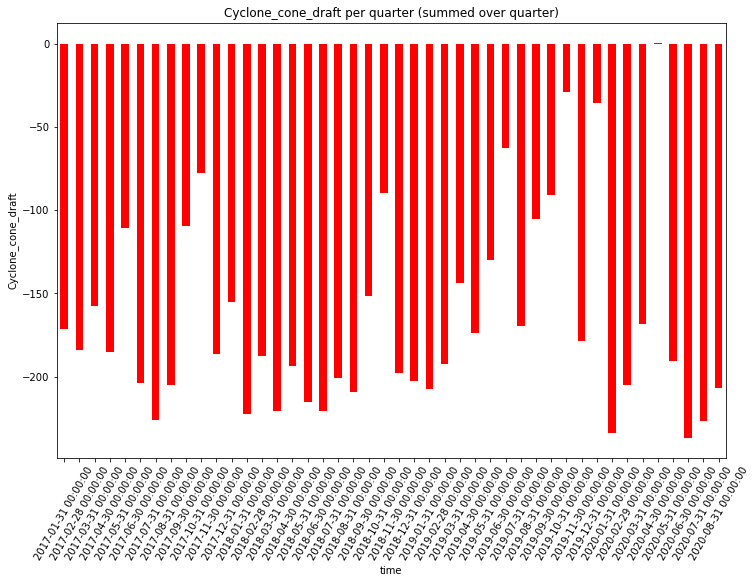

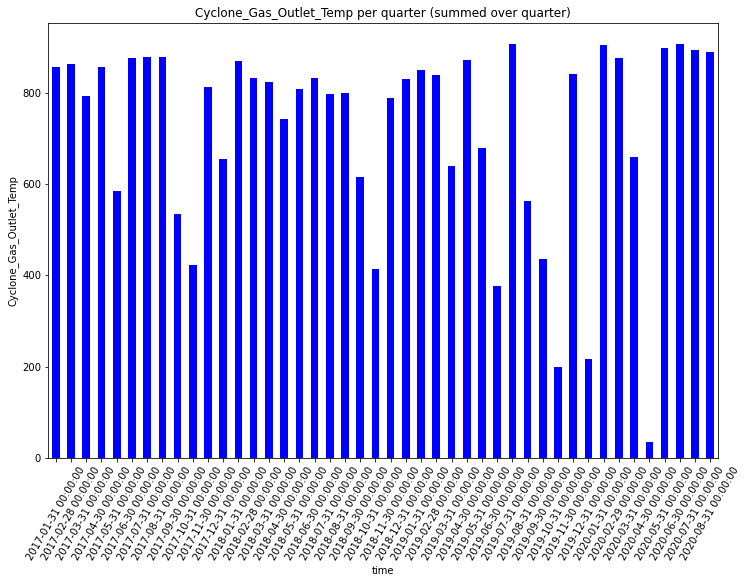

In [15]:
## Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)

df['Cyclone_Inlet_Gas_Temp'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Cyclone_Inlet_Gas_Temp')
plt.title('Cyclone_Inlet_Gas_Temp per month (averaged over month)')
plt.tight_layout()
plt.show()
## mean of Cyclone_cone_draft' resampled over month
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)

df['Cyclone_cone_draft'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Cyclone_cone_draft')
plt.title('Cyclone_cone_draft per quarter (summed over quarter)')
plt.show()
## mean of Cyclone_cone_draft' resampled over month
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)

df['Cyclone_Gas_Outlet_Temp'].resample('M').mean().plot(kind='bar', color='Blue')
plt.xticks(rotation=60)
plt.ylabel('Cyclone_Gas_Outlet_Temp')
plt.title('Cyclone_Gas_Outlet_Temp per quarter (summed over quarter)')
plt.show()

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

constant mean and mean is not time-dependent
constant variance and variance is not time-dependent
constant covariance and covariance is not time-dependent
But Ww will be working on lstm so no need to check the anything 

In [16]:
### EDA 

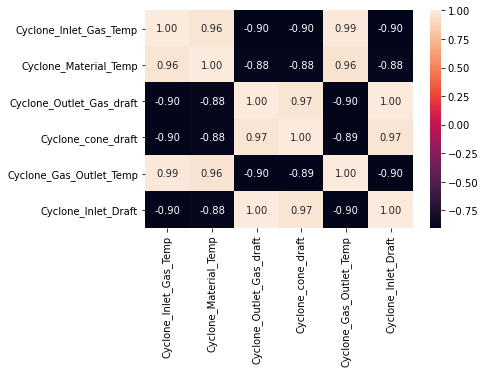

In [17]:
# Correlations among columns
g=sns.heatmap(df.corr(),annot=True ,fmt=".2f")

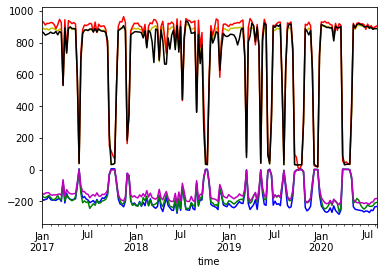

In [18]:
## resampling over week and computing mean
df.Cyclone_Inlet_Gas_Temp.resample('W').mean().plot(color='y' )
df.Cyclone_Material_Temp.resample('W').mean().plot(color='r')
df.Cyclone_Outlet_Gas_draft.resample('W').mean().plot(color='b')
df.Cyclone_cone_draft.resample('W').mean().plot(color='g')
df.Cyclone_Gas_Outlet_Temp.resample('W').mean().plot(color='k')
df.Cyclone_Inlet_Draft.resample('W').mean().plot(color='m')
plt.show()

From above two plots it is seen Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp, Cyclone_Gas_Outlet_Temp are heavly corelated 
Cyclone_Outlet_Gas_draft
Cyclone_cone_draft         
Cyclone_Inlet_Draft        
are corelated and this is a obsevation to keep in mind.

In [19]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [20]:
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


In [21]:
# Feature engineering for LSTM
reframed_data = series_to_supervised(df, 1, 1)
print(reframed_data.head())

                     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  \
time                                                                         
2017-01-01 00:05:00     867.63     910.42    -189.54    -186.04     852.13   
2017-01-01 00:10:00     879.23     918.14    -184.33    -182.10     862.53   
2017-01-01 00:15:00     875.67     924.18    -181.26    -166.47     866.06   
2017-01-01 00:20:00     875.28     923.15    -179.15    -174.83     865.85   
2017-01-01 00:25:00     891.66     934.26    -178.32    -173.72     876.06   

                     var6(t-1)  var1(t)  var2(t)  var3(t)  var4(t)  var5(t)  \
time                                                                          
2017-01-01 00:05:00    -145.90   879.23   918.14  -184.33  -182.10   862.53   
2017-01-01 00:10:00    -149.76   875.67   924.18  -181.26  -166.47   866.06   
2017-01-01 00:15:00    -145.01   875.28   923.15  -179.15  -174.83   865.85   
2017-01-01 00:20:00    -142.82   891.66   934.26  -178.32 

In [22]:
# drop columns we don't want
reframed_data.drop(reframed_data.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed_data.columns)

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var1(t)'],
      dtype='object')


In [23]:
# split into train and test sets
values = reframed_data.values
train_index = 500*24 #The logic is to have 500 days worth of training data. this could also be a hyperparameter that can be tuned.
train = values[:train_index, :]
test = values[train_index:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(12000, 1, 6) (12000,) (363770, 1, 6) (363770,)


Epoch 1/100
400/400 [==============================] - 23s 50ms/step - loss: 761728.0625 - val_loss: 596017.6250
Epoch 2/100
400/400 [==============================] - 19s 47ms/step - loss: 729281.6250 - val_loss: 573404.1250
Epoch 3/100
400/400 [==============================] - 19s 48ms/step - loss: 702203.3750 - val_loss: 552227.2500
Epoch 4/100
400/400 [==============================] - 20s 49ms/step - loss: 676267.0625 - val_loss: 531907.8750
Epoch 5/100
400/400 [==============================] - 19s 47ms/step - loss: 651229.5000 - val_loss: 512290.3125
Epoch 6/100
400/400 [==============================] - 19s 47ms/step - loss: 627012.9375 - val_loss: 493301.7188
Epoch 7/100
400/400 [==============================] - 19s 47ms/step - loss: 603373.3750 - val_loss: 474874.3125
Epoch 8/100
400/400 [==============================] - 19s 48ms/step - loss: 580157.3750 - val_loss: 456974.9375
Epoch 9/100
400/400 [==============================] - 20s 51ms/step - loss: 557734.9375 - val_l

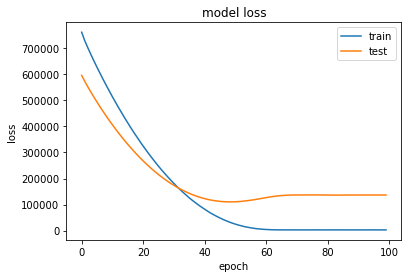

In [24]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=30, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
# make a prediction
yhat = model.predict(test_X, verbose=0)
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 369.742


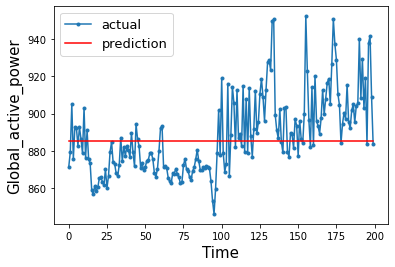

In [28]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, test_y[:200], marker='.', label="actual")
plt.plot(aa, yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=13)
plt.show()